Umbral fijo: 70 formas detectadas.
Área promedio (fijo): 9709.66
Perímetro promedio (fijo): 122.94
Umbral adaptativo: 104 formas detectadas.
Área promedio (adaptativo): 7503.12
Perímetro promedio (adaptativo): 176.41


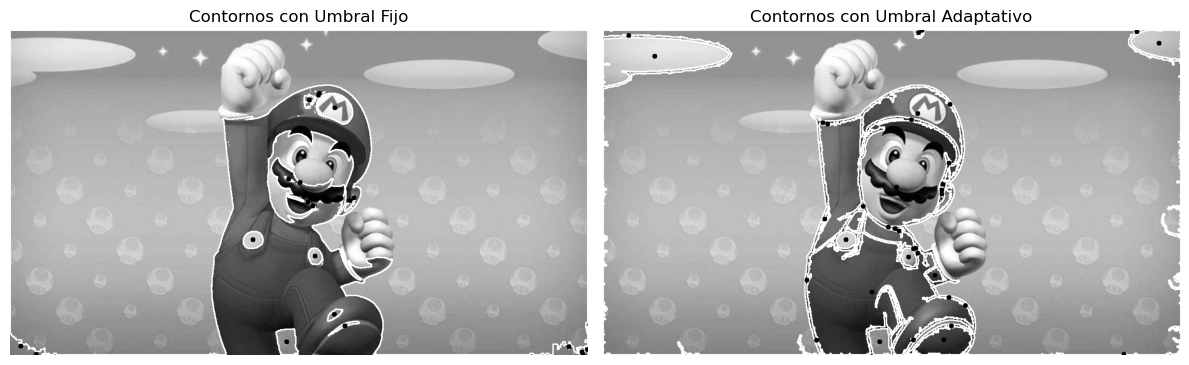

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen en escala de grises
path = 'mario.jpg'  # Cambia la ruta a tu imagen
img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Verificar si la imagen se cargó correctamente
if img_gray is None:
    print(f"No se pudo cargar la imagen en '{path}'. Asegúrate de que la ruta sea correcta.")
    exit()

# 1. Segmentación binaria - Umbral fijo
_, binary_fixed = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# 2. Segmentación binaria - Umbral adaptativo
binary_adaptive = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)

# 3. Detectar contornos con cv2.findContours()
contours_fixed, _ = cv2.findContours(binary_fixed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_adaptive, _ = cv2.findContours(binary_adaptive, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 4. Dibujar los contornos sobre la imagen original
img_contours_fixed = img_gray.copy()
img_contours_adaptive = img_gray.copy()
cv2.drawContours(img_contours_fixed, contours_fixed, -1, (255, 0, 0), 2)
cv2.drawContours(img_contours_adaptive, contours_adaptive, -1, (255, 0, 0), 2)

# 5. Calcular y visualizar el centro de masa y bounding boxes
num_shapes_fixed = len(contours_fixed)
num_shapes_adaptive = len(contours_adaptive)

area_avg_fixed = 0
perimeter_avg_fixed = 0
area_avg_adaptive = 0
perimeter_avg_adaptive = 0

for contour in contours_fixed:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img_contours_fixed, (cX, cY), 5, (0, 255, 0), -1)  # Dibuja el centro de masa
    area_avg_fixed += cv2.contourArea(contour)
    perimeter_avg_fixed += cv2.arcLength(contour, True)

for contour in contours_adaptive:
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.circle(img_contours_adaptive, (cX, cY), 5, (0, 255, 0), -1)  # Dibuja el centro de masa
    area_avg_adaptive += cv2.contourArea(contour)
    perimeter_avg_adaptive += cv2.arcLength(contour, True)

# Promedio de área y perímetro
if num_shapes_fixed > 0:
    area_avg_fixed /= num_shapes_fixed
    perimeter_avg_fixed /= num_shapes_fixed

if num_shapes_adaptive > 0:
    area_avg_adaptive /= num_shapes_adaptive
    perimeter_avg_adaptive /= num_shapes_adaptive

# 6. Mostrar métricas
print(f"Umbral fijo: {num_shapes_fixed} formas detectadas.")
print(f"Área promedio (fijo): {area_avg_fixed:.2f}")
print(f"Perímetro promedio (fijo): {perimeter_avg_fixed:.2f}")

print(f"Umbral adaptativo: {num_shapes_adaptive} formas detectadas.")
print(f"Área promedio (adaptativo): {area_avg_adaptive:.2f}")
print(f"Perímetro promedio (adaptativo): {perimeter_avg_adaptive:.2f}")

# Mostrar imágenes con los contornos y resultados
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(img_contours_fixed, cmap='gray')
axes[0].set_title('Contornos con Umbral Fijo')
axes[0].axis('off')

axes[1].imshow(img_contours_adaptive, cmap='gray')
axes[1].set_title('Contornos con Umbral Adaptativo')
axes[1].axis('off')

plt.tight_layout()
plt.show()
